# Lab Assignment 1: Neural Network from Scratch  

**Name:** Laksh Pacholy

**PRN:** 202301040263

**Course:** Deep Learning Lab  

**GitHub Repository:**



## Aim  
To implement a feedforward neural network from scratch using forward pass, backpropagation, and gradient descent, and to display updated weights at each epoch. The trained network is then tested using user input.


### Step 1: Importing the libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)


### Step 2: Defining Activation Functions

In [2]:

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x * (1-x)


### Step 3: Defining Training Data

In [3]:

X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y = np.array([[0,0,0,1,1],
              [1,0,1,1,0],
              [1,0,1,1,0],
              [0,1,1,0,0]])


### Step 4: Network Configuration

In [4]:

input_neurons = 2
hidden_neurons = 5
output_neurons = 5
learning_rate = 0.7
epochs = 800


### Step 5: Initializing Weights and Biases

In [5]:

W1 = np.random.randn(input_neurons, hidden_neurons)
b1 = np.zeros((1, hidden_neurons))

W2 = np.random.randn(hidden_neurons, output_neurons)
b2 = np.zeros((1, output_neurons))

print("Initial W1:", W1)
print("Initial W2:", W2)


Initial W1: [[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
 [-0.23413696  1.57921282  0.76743473 -0.46947439  0.54256004]]
Initial W2: [[-0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783]
 [-0.56228753 -1.01283112  0.31424733 -0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763   0.0675282  -1.42474819 -0.54438272]
 [ 0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375]
 [-0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491]]


### Step 6: Training the Neural Network

In [6]:

losses = []

for epoch in range(epochs):

    # Forward Pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Loss Calculation
    loss = np.mean((a2 - y) ** 2)
    losses.append(loss)

    # Backpropagation
    d_output = (a2 - y) * sigmoid_derivative(a2)
    d_hidden = np.dot(d_output, W2.T) * sigmoid_derivative(a1)

    # Gradients
    dW2 = np.dot(a1.T, d_output)
    db2 = np.sum(d_output, axis=0, keepdims=True)

    dW1 = np.dot(X.T, d_hidden)
    db1 = np.sum(d_hidden, axis=0, keepdims=True)

    # Weight Update (Gradient Descent)
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    print(f"Epoch {epoch+1} Loss: {loss}")
    print("Updated W1:", W1)
    print("Updated W2:", W2)


Streaming output truncated to the last 5000 lines.
 [-1.15609163  0.43652717  2.19704938 -1.42732311 -2.75275011]
 [ 4.83925429  0.33358469  3.27546952 -0.77222543 -3.1063525 ]
 [-0.53987608 -2.45871619 -0.74807553  1.75438252  0.80708618]
 [-2.44829732  3.66739991  1.12481241 -1.92829315  0.07282256]]
Epoch 204 Loss: 0.015357880950579522
Updated W1: [[ 3.12791834  1.54484906  4.7087658  -0.75641169  2.58022194]
 [ 2.30478163  2.58033224  4.40042786 -1.78725973  2.41694975]]
Updated W2: [[-2.33216794  2.22057626  1.96650827 -3.40602718 -3.02105921]
 [-1.15924869  0.4388647   2.1999623  -1.42986859 -2.75550242]
 [ 4.85478678  0.3318171   3.28282636 -0.77051749 -3.11335563]
 [-0.54254358 -2.4622498  -0.7510367   1.75801243  0.80965981]
 [-2.4574279   3.67213206  1.12666019 -1.93316761  0.07106502]]
Epoch 205 Loss: 0.015189181976751148
Updated W1: [[ 3.1309645   1.5479462   4.71739841 -0.76150971  2.58506302]
 [ 2.30995399  2.58027442  4.40834251 -1.78814583  2.42232078]]
Updated W2: [[-2

### Step 7: Final Predictions on Training Dataset

In [7]:
z1 = np.dot(X, W1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, W2) + b2
predictions = sigmoid(z2)

print("Final Predictions:", np.round(predictions, 2))


Final Predictions: [[0.06 0.   0.05 1.   0.95]
 [0.95 0.03 0.97 0.97 0.03]
 [0.94 0.03 0.97 0.97 0.03]
 [0.05 0.96 1.   0.04 0.  ]]


### Step 8: Loss Visualization

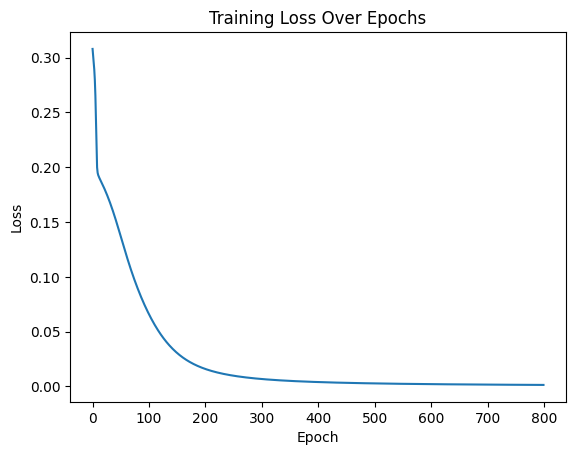

In [8]:

plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


### Step 9: Testing the Network with User Input

In [9]:
a = float(input("Enter first input (0 or 1): "))
b = float(input("Enter second input (0 or 1): "))

test_input = np.array([[a, b]])

z1_test = np.dot(test_input, W1) + b1
a1_test = sigmoid(z1_test)
z2_test = np.dot(a1_test, W2) + b2
output_test = sigmoid(z2_test)

gate_names = ["XOR", "AND", "OR", "NAND", "NOR"]

print("\nNetwork Output (Gate-wise):")
for i, gate in enumerate(gate_names):
    print(f"{gate}: {round(output_test[0][i], 2)}")

Enter first input (0 or 1): 1
Enter second input (0 or 1): 0

Network Output (Gate-wise):
XOR: 0.94
AND: 0.03
OR: 0.97
NAND: 0.97
NOR: 0.03


## Conclusion  
The neural network was successfully implemented from scratch using forward pass, backpropagation, and gradient descent. The model learned multiple logical functions simultaneously, showing how hidden layers help solve non-linear problems. The loss decreased over epochs, demonstrating effective learning. Printing weight updates in each epoch provided a clear view of how the network improves over time. This experiment helped in understanding the core principles of neural network training, which are fundamental to modern artificial intelligence.
